In [43]:
import pandas as pd
from Bio import Entrez

Entrez.email = "a_polakof@ucsb.edu" 

In [44]:
df = pd.read_csv("SFARI-Gene_genes_09-02-2021release_11-22-2021export.csv")

In [45]:
df.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


Text(0, 0.5, 'Number of genes')

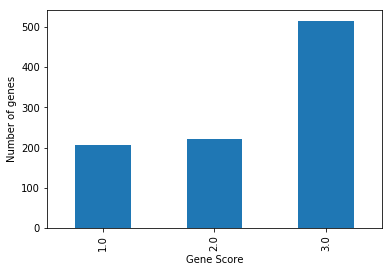

In [93]:
# Task 1 - Plot a bar chart of the number of genes in each SFARI gene-score category (2 marks). 

df_gene_score = df.groupby(["gene-score"]).count().iloc[:, 0]
ax = df_gene_score.plot.bar()
ax.set_xlabel("Gene Score")
ax.set_ylabel("Number of genes")

In [47]:
# Task 2 - Rank the genes by ‘number-of-reports’ and find the top 
# 5 SFARI genes that are in gene-score category 1 (2 marks).

df_gene_cat_1 = df.loc[df["gene-score"] == 1.0]

df_gene_cat_1_sorted = df_gene_cat_1.sort_values(by=["number-of-reports"], ascending = False).iloc[:5,:]

df_gene_cat_1_sorted

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
596,9,NRXN1,neurexin 1,ENSG00000179915,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,94
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
780,9,SCN1A,"sodium channel, voltage-gated, type I, alpha s...",ENSG00000144285,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,68


In [48]:
# Task 3 - For each of these genes find the number of papers in PubMed 
# that include the gene AND are related to Autism (5 marks).


for df_row in df_gene_cat_1_sorted.iterrows():
    # Currently using word Autism, better approaches should be available
    handle = Entrez.egquery(term='"Autism"'+' AND ({} OR {})'.format(df_row[1]["gene-name"], df_row[1]["gene-symbol"]))
    record = Entrez.read(handle)
    handle.close()

    for row in record["eGQueryResult"]:
        if row["DbName"]=="pubmed":
            print("Gene: ", df_row[1]["gene-symbol"])
            print(row["Count"]+' papers\n')

Gene:  NRXN1
235 papers

Gene:  SHANK3
409 papers

Gene:  MECP2
434 papers

Gene:  SCN2A
84 papers

Gene:  SCN1A
67 papers



In [68]:
# Task 4 - From these data fill a table with genes as rows and paper count by year as column (3 marks).

def get_gene_papers_by_year(df_row):
    gene_paper_count = {}
    for year in range(2000, 2022):
        # Currently using word Autism, better approaches should be available
        handle = Entrez.egquery(term='{} + [dp] AND ("Autism" AND ({} OR {}))'.format(str(year), df_row["gene-name"], df_row["gene-symbol"]))
        record = Entrez.read(handle)
        handle.close()

        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                gene_paper_count[str(year)] = int(row["Count"])
                    
    return gene_paper_count

# df_gene_counts = pd.DataFrame.from_dict(get_gene_papers_by_year(df_row), orient='index', columns=['counts'])
gene1_count = get_gene_papers_by_year(df_gene_cat_1_sorted.iloc[0, :])
gene2_count = get_gene_papers_by_year(df_gene_cat_1_sorted.iloc[1, :])
gene3_count = get_gene_papers_by_year(df_gene_cat_1_sorted.iloc[2, :])
gene4_count = get_gene_papers_by_year(df_gene_cat_1_sorted.iloc[3, :])
gene5_count = get_gene_papers_by_year(df_gene_cat_1_sorted.iloc[4, :])

In [70]:
df_gene1_count = pd.DataFrame.from_dict([gene1_count])
df_gene2_count = pd.DataFrame.from_dict([gene2_count])
df_gene3_count = pd.DataFrame.from_dict([gene3_count])
df_gene4_count = pd.DataFrame.from_dict([gene4_count])
df_gene5_count = pd.DataFrame.from_dict([gene5_count])

df_gene_count_concat = pd.concat([df_gene1_count, df_gene2_count, df_gene3_count, df_gene4_count, df_gene5_count])

In [94]:
df_gene_count_concat
temp = df_gene_count_concat.set_index([pd.Index(["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"])])
temp.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
NRXN1,0,0,0,0,1,2,1,5,13,18,...,22,24,22,24,13,20,18,24,17,14
SHANK3,0,0,0,0,0,2,1,3,9,9,...,20,31,33,30,47,43,56,56,57,61
MECP2,3,1,6,5,7,12,11,17,17,21,...,26,31,37,41,47,41,25,34,30,19
SCN2A,0,0,0,1,1,0,0,0,2,0,...,1,2,6,7,8,8,11,18,12,18
SCN1A,0,0,0,1,1,0,0,0,1,1,...,8,4,4,6,6,6,6,8,11,9


In [88]:
temp.transpose().head()

,NRXN1,SHANK3,MECP2,SCN2A,SCN1A
2000,0,0,3,0,0
2001,0,0,1,0,0
2002,0,0,6,0,0
2003,0,0,5,1,1
2004,1,0,7,1,1


Text(0, 0.5, 'Papers')

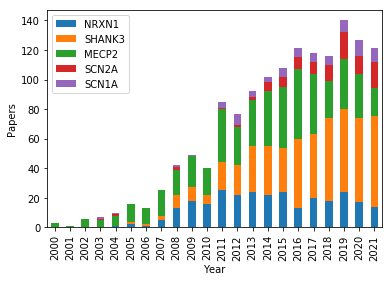

In [92]:
# Task 5 - Plot a single stacked histogram displaying the data from the table (3 marks).

ax = temp.transpose().plot.bar(stacked=True)
ax.set_xlabel("Year")
ax.set_ylabel("Papers")

In [97]:
temp.transpose().describe()

,NRXN1,SHANK3,MECP2,SCN2A,SCN1A
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,12.681818,21.954545,22.045455,4.363636,3.454545
std,9.613415,22.486985,13.716439,5.851703,3.541956
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.250000,1.250000,11.250000,0.000000,0.000000
50%,15.000000,14.000000,20.000000,1.000000,2.500000
75%,21.500000,40.500000,33.250000,7.750000,6.000000
max,25.000000,61.000000,47.000000,18.000000,11.000000
